In [1]:
import pandas as pd
df= pd.read_csv('Data Sample (AIC) для итоговой работы  - Online Retail.csv', decimal=',', parse_dates=['InvoiceDate'])
df.describe()


,Quantity,UnitPrice,CustomerID
count,54214.000000,54214.000000,40643.000000
mean,9.610802,4.307341,15283.422803
std,57.358422,47.834496,1707.982278
min,-9600.000000,0.000000,12347.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16775.000000
max,2400.000000,6930.000000,18287.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    54214 non-null  object        
 1   StockCode    54214 non-null  object        
 2   Description  54080 non-null  object        
 3   Quantity     54214 non-null  int64         
 4   InvoiceDate  54214 non-null  datetime64[ns]
 5   UnitPrice    54214 non-null  float64       
 6   CustomerID   40643 non-null  float64       
 7   Country      54214 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.3+ MB


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom


In [4]:
pd.unique(df.CustomerID)

array([17850., 13047., 14688., ..., 17436., 14569., 12713.])

In [5]:
#посчитаем все пропуски в %. При наличии в столбце пропусков более 80%- такую информацию не надо бкдет принимать в расчет
(df.isna().mean() * 100).round(2)

InvoiceNo       0.00
StockCode       0.00
Description     0.25
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     25.03
Country         0.00
dtype: float64

Критичесого количества пропусков нет, только CustomerID имеет самый большой процент пррпусков- 25.03. Начнем по столбцам разбираться с отсутствующими значениями.

In [6]:
#оставим только те строки, где значение столбца Description = NaN
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
204,536553,37461,NaN,3,2010-12-01 14:35:00,0.0,NaN,United Kingdom
730,536995,35951,NaN,57,2010-12-03 15:29:00,0.0,NaN,United Kingdom
731,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
732,537005,21692,NaN,-70,2010-12-03 15:35:00,0.0,NaN,United Kingdom
733,537009,84534B,NaN,-80,2010-12-03 15:38:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
48602,577608,35400,NaN,5,2011-11-21 09:22:00,0.0,NaN,United Kingdom
49770,578360,84971L,NaN,2,2011-11-24 10:36:00,0.0,NaN,United Kingdom
50021,578693,21811,NaN,1,2011-11-25 09:38:00,0.0,NaN,United Kingdom
52171,580359,20775,NaN,-35,2011-12-02 16:11:00,0.0,NaN,United Kingdom


**Мы видим цена за единицу товара всегда =0, и количество товара  то положительное, то отрицательное(возврат товара.
Так как нам предстоит пронализировать эту выборку и восстановить название товара по цене невозможно,
удалим эти строки**

In [7]:
df.dropna(subset = ['Description'], inplace=True)

In [8]:
#проверим удаление строк с NAN в столбце Description
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54080 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    54080 non-null  object        
 1   StockCode    54080 non-null  object        
 2   Description  54080 non-null  object        
 3   Quantity     54080 non-null  int64         
 4   InvoiceDate  54080 non-null  datetime64[ns]
 5   UnitPrice    54080 non-null  float64       
 6   CustomerID   40643 non-null  float64       
 7   Country      54080 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.7+ MB


In [10]:
#оставим только те строки, где значение столбца CustomerID = NaN
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
158,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
159,536544,21870,I CAN ONLY PLEASE ONE PERSON MUG,1,2010-12-01 14:32:00,3.36,NaN,United Kingdom
160,536544,21879,HEARTS GIFT TAPE,1,2010-12-01 14:32:00,1.66,NaN,United Kingdom
161,536544,21928,JUMBO BAG SCANDINAVIAN PAISLEY,1,2010-12-01 14:32:00,4.21,NaN,United Kingdom
162,536544,22069,BROWN PIRATE TREASURE CHEST,1,2010-12-01 14:32:00,3.36,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
54161,581498,48138,DOORMAT UNION FLAG,1,2011-12-09 10:26:00,14.13,NaN,United Kingdom
54162,581498,82482,WOODEN PICTURE FRAME WHITE FINISH,4,2011-12-09 10:26:00,4.96,NaN,United Kingdom
54163,581498,84032A,CHARLIE+LOLA PINK HOT WATER BOTTLE,4,2011-12-09 10:26:00,5.79,NaN,United Kingdom
54164,581498,84558a,3D DOG PICTURE PLAYING CARDS,1,2011-12-09 10:26:00,5.79,NaN,United Kingdom


 **Для проведения анализа клиентов необходимо будет работать с в том числе и с кодом клиента. Так как количестыо строк без кода клиента 
 велико -25%, оставляем эти строки (будем анализировать клиентов учитывая эту информацию)**

Для анализа нам будет необходима сумма покупки. **Для этого добавим столбец с Суммой покупки (цена за единицу * количество)**

In [11]:
df['SaleAmount'] = df['Quantity'] * df['UnitPrice']

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom,22.00


В столбцах, содержащие денежные значения, в наименованиях столбцов укажем наименование валюты. 
Т.к как мы увидим в будущем, большинство товров продается в UK, обозначим валюту как фунты

In [13]:
df.rename(columns={'UnitPrice': 'UnitPrice, £', 'SaleAmount': 'SaleAmount, £'},inplace=True)

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,"UnitPrice, £",CustomerID,Country,"SaleAmount, £"
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom,22.00


## Проверим, всегда ли соответствует ли описание Description уникальному коду StockCode


In [15]:
#сгруппируем по полю Stockcode, затем считаем кол-во соответствий одному коду разных описаний
doubles_description = df.groupby('StockCode')['Description'].unique()
doubles_description_count = doubles_description.apply(lambda x: len(x)).sort_values(ascending=False)
doubles_description_count

StockCode
79030G          3
23126           3
23236           3
85135C          3
82600           3
               ..
22327           1
22328           1
22329           1
22331           1
gift_0001_30    1
Name: Description, Length: 3314, dtype: int64

In [16]:
#Оставим только значения, которые больше 1 (есть повторы)
doubles_Series = pd.Series(doubles_description_count)
doubles_Series = doubles_Series[doubles_Series > 1]
doubles_Series

StockCode
79030G    3
23126     3
23236     3
85135C    3
82600     3
         ..
20622     2
22837     2
22416     2
22030     2
23396     2
Name: Description, Length: 168, dtype: int64

**Итого мы видим 168 кодов в базе, которые имеют 2 или 3 различных описания. Это ошибка, которую нам предстоит исправить**

Посмотрим, чем харакетрны повторения внутри кажного кода. Возьмем 3 кода и посмотрим на нихЖ

In [17]:
df[df['StockCode'] == '79030G']['Description']

5163     TUMBLER, NEW ENGLAND
15534     TUMBLER NEW ENGLAND
16651     TUMBLER NEW ENGLAND
17170     TUMBLER NEW ENGLAND
18227     TUMBLER NEW ENGLAND
18549     TUMBLER NEW ENGLAND
19035     TUMBLER NEW ENGLAND
20136                 damages
21028     TUMBLER NEW ENGLAND
Name: Description, dtype: object

In [18]:
df[df['StockCode'] == '23126']['Description']

14621    DOLLCRAFT GIRL AMELIE KIT
15584    FELTCRAFT GIRL AMELIE KIT
17008    FELTCRAFT GIRL AMELIE KIT
18256    FELTCRAFT GIRL AMELIE KIT
19416    FELTCRAFT GIRL AMELIE KIT
19830        DOLLCRAFT GIRL AMELIE
20299    FELTCRAFT GIRL AMELIE KIT
24214    FELTCRAFT GIRL AMELIE KIT
28705    FELTCRAFT GIRL AMELIE KIT
30685    FELTCRAFT GIRL AMELIE KIT
31607    FELTCRAFT GIRL AMELIE KIT
32144    FELTCRAFT GIRL AMELIE KIT
35357    FELTCRAFT GIRL AMELIE KIT
39772    FELTCRAFT GIRL AMELIE KIT
40907    FELTCRAFT GIRL AMELIE KIT
44033    FELTCRAFT GIRL AMELIE KIT
46186    FELTCRAFT GIRL AMELIE KIT
47246    FELTCRAFT GIRL AMELIE KIT
47565    FELTCRAFT GIRL AMELIE KIT
47745    FELTCRAFT GIRL AMELIE KIT
48021    FELTCRAFT GIRL AMELIE KIT
48596    FELTCRAFT GIRL AMELIE KIT
51851    FELTCRAFT GIRL AMELIE KIT
52804    FELTCRAFT GIRL AMELIE KIT
53135    FELTCRAFT GIRL AMELIE KIT
53809    FELTCRAFT GIRL AMELIE KIT
Name: Description, dtype: object

In [19]:
df[df['StockCode'] == '23396']['Description']

32969    LA JARDIN BOTANIQUE CUSHION COVER
33292    LA JARDIN BOTANIQUE CUSHION COVER
34773    LA JARDIN BOTANIQUE CUSHION COVER
35065    LE JARDIN BOTANIQUE CUSHION COVER
37167    LE JARDIN BOTANIQUE CUSHION COVER
37448    LE JARDIN BOTANIQUE CUSHION COVER
38372    LE JARDIN BOTANIQUE CUSHION COVER
38434    LE JARDIN BOTANIQUE CUSHION COVER
39396    LE JARDIN BOTANIQUE CUSHION COVER
39710    LE JARDIN BOTANIQUE CUSHION COVER
41717    LE JARDIN BOTANIQUE CUSHION COVER
42291    LE JARDIN BOTANIQUE CUSHION COVER
43927    LE JARDIN BOTANIQUE CUSHION COVER
45311    LE JARDIN BOTANIQUE CUSHION COVER
46365    LE JARDIN BOTANIQUE CUSHION COVER
46808    LE JARDIN BOTANIQUE CUSHION COVER
47650    LE JARDIN BOTANIQUE CUSHION COVER
48924    LE JARDIN BOTANIQUE CUSHION COVER
49703    LE JARDIN BOTANIQUE CUSHION COVER
Name: Description, dtype: object

Видно, что большинство значений верно. Значит можно заменить ошибки, заменив их на модальные значения.

In [20]:
#создадим функцию, которая будет заменять Description модальным значением внутри каждого StockCode
#функция принимает згачение StockCode и выдает модальное значение Description
def Description_mode_change(stockCode_value):
    result = df.loc[df['StockCode'] == stockCode_value]['Description'].mode(1)[0]
    return result

In [21]:
#пройдемся по всему датафрейму и применим вышеобозначенную функцию 
#аргуметом в функции будет значение ячейки в столбце StockCode
df['Description'] = df.apply(lambda x: Description_mode_change(x['StockCode']),axis=1)


Посмотрим на результат

In [22]:
df.loc[df['StockCode'] == '79030G']['Description']

5163     TUMBLER NEW ENGLAND
15534    TUMBLER NEW ENGLAND
16651    TUMBLER NEW ENGLAND
17170    TUMBLER NEW ENGLAND
18227    TUMBLER NEW ENGLAND
18549    TUMBLER NEW ENGLAND
19035    TUMBLER NEW ENGLAND
20136    TUMBLER NEW ENGLAND
21028    TUMBLER NEW ENGLAND
Name: Description, dtype: object

In [23]:
df.loc[df['StockCode'] == '23396']['Description']

32969    LE JARDIN BOTANIQUE CUSHION COVER
33292    LE JARDIN BOTANIQUE CUSHION COVER
34773    LE JARDIN BOTANIQUE CUSHION COVER
35065    LE JARDIN BOTANIQUE CUSHION COVER
37167    LE JARDIN BOTANIQUE CUSHION COVER
37448    LE JARDIN BOTANIQUE CUSHION COVER
38372    LE JARDIN BOTANIQUE CUSHION COVER
38434    LE JARDIN BOTANIQUE CUSHION COVER
39396    LE JARDIN BOTANIQUE CUSHION COVER
39710    LE JARDIN BOTANIQUE CUSHION COVER
41717    LE JARDIN BOTANIQUE CUSHION COVER
42291    LE JARDIN BOTANIQUE CUSHION COVER
43927    LE JARDIN BOTANIQUE CUSHION COVER
45311    LE JARDIN BOTANIQUE CUSHION COVER
46365    LE JARDIN BOTANIQUE CUSHION COVER
46808    LE JARDIN BOTANIQUE CUSHION COVER
47650    LE JARDIN BOTANIQUE CUSHION COVER
48924    LE JARDIN BOTANIQUE CUSHION COVER
49703    LE JARDIN BOTANIQUE CUSHION COVER
Name: Description, dtype: object

In [24]:
df[df['StockCode'] == '23396']['Description']

32969    LE JARDIN BOTANIQUE CUSHION COVER
33292    LE JARDIN BOTANIQUE CUSHION COVER
34773    LE JARDIN BOTANIQUE CUSHION COVER
35065    LE JARDIN BOTANIQUE CUSHION COVER
37167    LE JARDIN BOTANIQUE CUSHION COVER
37448    LE JARDIN BOTANIQUE CUSHION COVER
38372    LE JARDIN BOTANIQUE CUSHION COVER
38434    LE JARDIN BOTANIQUE CUSHION COVER
39396    LE JARDIN BOTANIQUE CUSHION COVER
39710    LE JARDIN BOTANIQUE CUSHION COVER
41717    LE JARDIN BOTANIQUE CUSHION COVER
42291    LE JARDIN BOTANIQUE CUSHION COVER
43927    LE JARDIN BOTANIQUE CUSHION COVER
45311    LE JARDIN BOTANIQUE CUSHION COVER
46365    LE JARDIN BOTANIQUE CUSHION COVER
46808    LE JARDIN BOTANIQUE CUSHION COVER
47650    LE JARDIN BOTANIQUE CUSHION COVER
48924    LE JARDIN BOTANIQUE CUSHION COVER
49703    LE JARDIN BOTANIQUE CUSHION COVER
Name: Description, dtype: object

In [25]:
#Посмотрим на сводный результат
doubles_description = df.groupby('StockCode')['Description'].unique()
doubles_description_count = doubles_description.apply(lambda x: len(x)).sort_values(ascending=False)
doubles_description_count

StockCode
10002           1
23508           1
23498           1
23499           1
23500           1
               ..
22308           1
22309           1
22310           1
22311           1
gift_0001_30    1
Name: Description, Length: 3314, dtype: int64

**Все сделано правильно, теперь одному коду соответствует одно описание**


In [26]:
#Посмотрим, на что еще обратить внимание
df.describe()

,Quantity,"UnitPrice, £",CustomerID,"SaleAmount, £"
count,54080.00000,54080.000000,40643.000000,54080.000000
mean,9.65956,4.318014,15283.422803,18.492897
std,57.17397,47.893242,1707.982278,83.424990
min,-9600.00000,0.000000,12347.000000,-6930.000000
25%,1.00000,1.250000,13969.000000,3.750000
50%,3.00000,2.100000,15152.000000,9.870000
75%,10.00000,4.130000,16775.000000,17.400000
max,2400.00000,6930.000000,18287.000000,4121.640000


<AxesSubplot:>

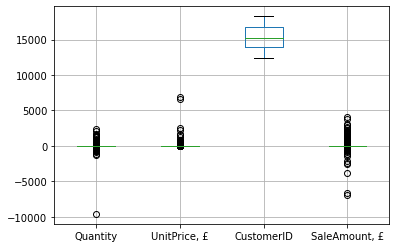

In [27]:
df.boxplot()

In [28]:
df.loc[df['Quantity'] < -5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,"UnitPrice, £",CustomerID,Country,"SaleAmount, £"
22627,556691,23005,TRAVEL CARD WALLET I LOVE LONDON,-9600,2011-06-14 10:37:00,0.0,NaN,United Kingdom,-0.0


Удалим это значение - это явный единичный выброс данных.

In [29]:
df = df.loc[df['Quantity'] > -5000]

Посмотрим на отрицательные значения <-5000 по  столбцу SaleAmount

In [30]:
df.loc[df['SaleAmount, £'] < -5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,"UnitPrice, £",CustomerID,Country,"SaleAmount, £"
17425,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029.0,United Kingdom,-6930.00
31245,C564341,AMAZONFEE,AMAZON FEE,-1,2011-08-24 14:53:00,6662.51,NaN,United Kingdom,-6662.51


Со второй строчкой Amazon fee, все понятно- это разовый платеж за услуги Amazon. Не имеет отношение к продажам. Удаляем. А что это за клиент, который делает возврат на 6930 c пометкой Инструкция?
Посмотрим движение по этому клиенту.

In [31]:
df.loc[df['CustomerID'] == 16029]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,"UnitPrice, £",CustomerID,Country,"SaleAmount, £"
22,536386,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,2010-12-01 09:57:00,1.65,16029.0,United Kingdom,165.00
3242,539101,22466,FAIRY TALE COTTAGE NIGHT LIGHT,408,2010-12-16 10:35:00,1.45,16029.0,United Kingdom,591.60
3243,539101,21731,RED TOADSTOOL LED NIGHT LIGHT,408,2010-12-16 10:35:00,1.25,16029.0,United Kingdom,510.00
4337,540029,22207,FRYING PAN UNION FLAG,24,2011-01-04 13:47:00,3.75,16029.0,United Kingdom,90.00
6498,541611,79321,CHILLI LIGHTS,96,2011-01-20 10:18:00,3.82,16029.0,United Kingdom,366.72
12254,546734,22932,BAKING MOULD TOFFEE CUP CHOCOLATE,96,2011-03-16 11:49:00,2.10,16029.0,United Kingdom,201.60
15362,549594,22779,WOODEN OWLS LIGHT GARLAND,48,2011-04-11 10:25:00,3.37,16029.0,United Kingdom,161.76
17425,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029.0,United Kingdom,-6930.00
18605,552786,22779,WOODEN OWLS LIGHT GARLAND,48,2011-05-11 12:14:00,3.37,16029.0,United Kingdom,161.76
21544,555585,22386,JUMBO BAG PINK POLKADOT,100,2011-06-06 09:12:00,1.74,16029.0,United Kingdom,174.00


Нет никаких похожих продаж этого товара ранее. Для целей анализа удаляем этот выброс (и сервисный сбор Amazon)

In [32]:
df = df.loc[df['SaleAmount, £'] != -6930.00]
df = df.loc[df['SaleAmount, £'] != -6662.51]
df = df.loc[df['UnitPrice, £'] != 6930.00]
df = df.loc[df['UnitPrice, £'] != 6662.51]

<AxesSubplot:>

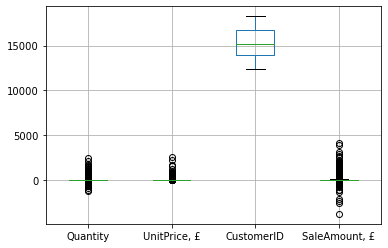

In [33]:
df.boxplot()

In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,"UnitPrice, £",CustomerID,Country,"SaleAmount, £"
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom,22.00


**Выбросы посмотрели, ненужные данные удалили**

### Проведем анализ данных. 
#### Цель -выявление трендов- продажи, клиенты растут или падают 
Построим линейные графики валового дохода, количества проданного товара и новых покупателей

In [35]:
#Заменим столбец InvoiceDate только датами (сейчас он содержит дату и время)
df['InvoiceDate_date'] = df['InvoiceDate'].dt.date
df.head()    

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,"UnitPrice, £",CustomerID,Country,"SaleAmount, £",InvoiceDate_date
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12-01
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85,2010-12-01
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85,2010-12-01
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom,22.00,2010-12-01


In [36]:
#добавим столбец с годом-неделей
df['InvoiceDate_Year_week'] = df['InvoiceDate'].dt.strftime('%Y-%U')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,"UnitPrice, £",CustomerID,Country,"SaleAmount, £",InvoiceDate_date,InvoiceDate_Year_week
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-48
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12-01,2010-48
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85,2010-12-01,2010-48
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85,2010-12-01,2010-48
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-48


In [37]:
#оставим только положительные значения отгрузок. Возвараты- убираем
df = df.loc[df['Quantity']>0]

In [38]:
#df.drop(['InvoiceDate_Year_month'],axis='columns',inplace=True) 

In [39]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,"UnitPrice, £",CustomerID,Country,"SaleAmount, £",InvoiceDate_date,InvoiceDate_Year_week
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-48
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12-01,2010-48
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85,2010-12-01,2010-48
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85,2010-12-01,2010-48
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-48


In [40]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 40,6

[Text(0.5, 0, 'Дата '), Text(0, 0.5, 'Сумма, £')]

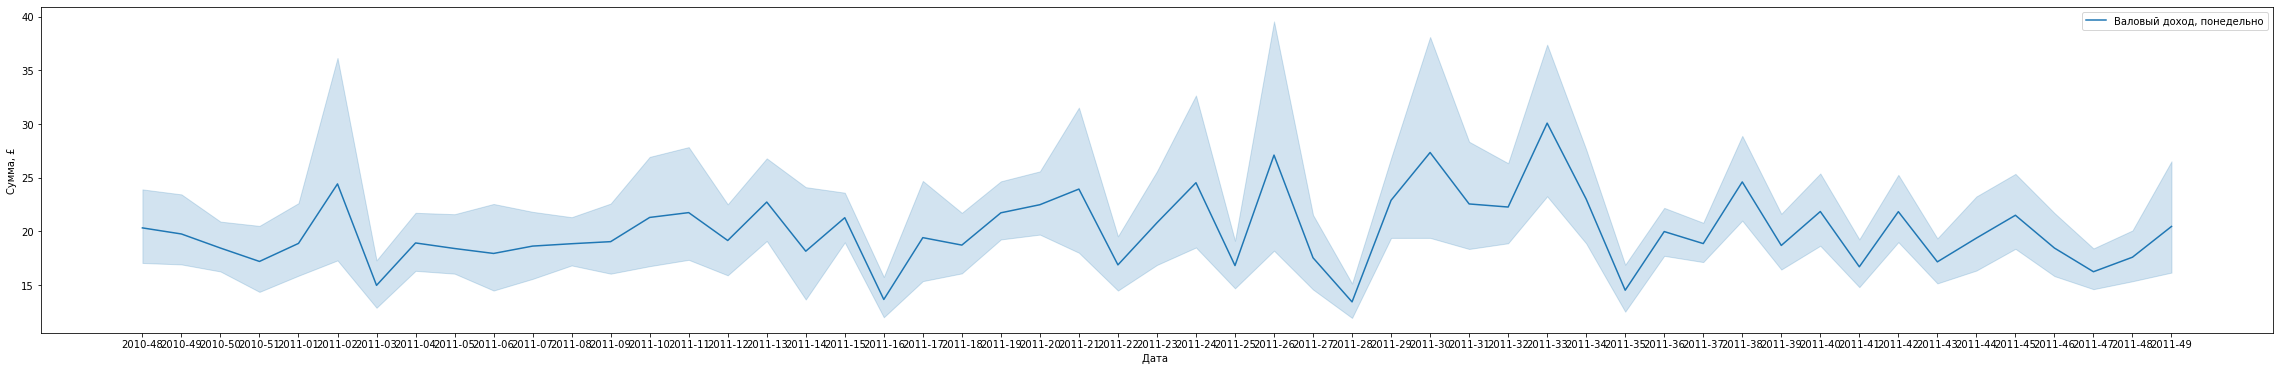

In [41]:
#Валовый доход 
sns.lineplot(data=df,x='InvoiceDate_Year_week',y='SaleAmount, £',
             label="Валовый доход, понедельно").set(xlabel='Дата ',ylabel='Сумма, £')


[Text(0.5, 0, 'Дата '), Text(0, 0.5, 'Кол-во')]

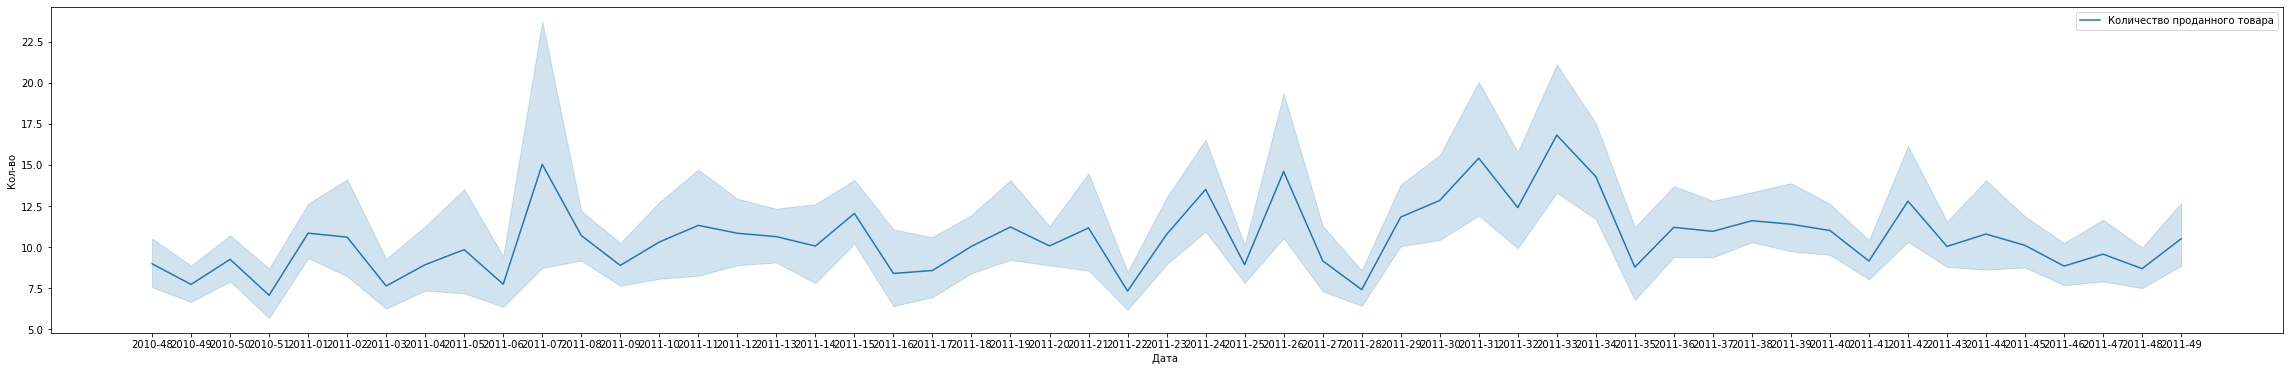

In [42]:
#Кол-во проданного товара 
sns.lineplot(data=df,x='InvoiceDate_Year_week',y='Quantity',
             label="Количество проданного товара").set(xlabel='Дата ',ylabel='Кол-во')

[Text(0.5, 0, 'Дата '), Text(0, 0.5, 'Кол-во новых клиентов')]

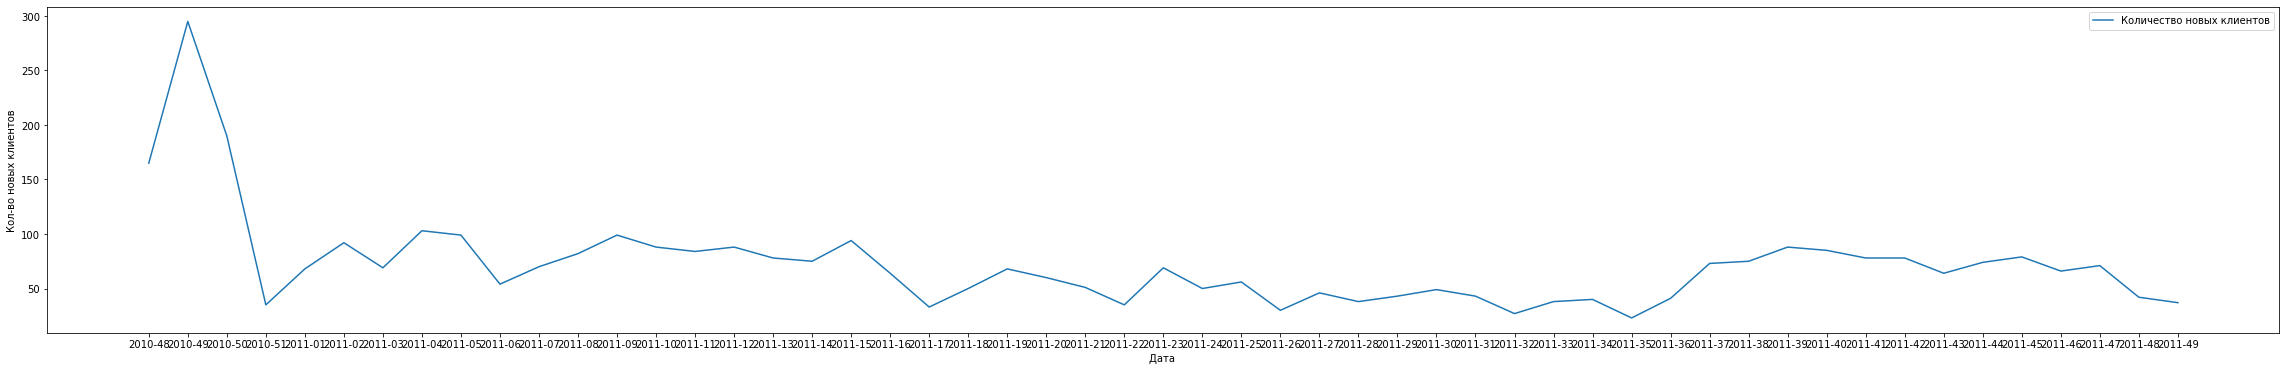

In [43]:
#Количество новых клиентов еженедельно 
df_new_customers_week = df.groupby('CustomerID').first().reset_index()[['CustomerID','InvoiceDate_Year_week']]
df_new_customers_week = df_new_customers_week.groupby(df_new_customers_week['InvoiceDate_Year_week']).agg({'CustomerID':'count'})

sns.lineplot(data=df_new_customers_week,x='InvoiceDate_Year_week',y='CustomerID',
             label="Количество новых клиентов").set(xlabel='Дата ',ylabel='Кол-во новых клиентов')

### Выводы:
Общий ограничения- данных только есть за 1 гол, невозможно сравнить 2 одинаковых периода (может есть сезонность) Ограничимся только выводами за 1 год

Валовый доход: с 32 недели 2011 года падение 

Количество проданных товаров: с 32 недели 2011 года падение 

Количество новых клиентов: c 35 недели идет рост количества клиентов

Можно сделать предположение, что ARPU(средний чек клиента) падает

Проверим это построением графика ARPU


In [46]:
#Переименуем столбец CustomerID
df_new_customers_week = df_new_customers_week.rename(columns={'CustomerID': 'New_clients_week'})
df_new_customers_week.head()

,New_clients_week
InvoiceDate_Year_week,
2010-48,165
2010-49,295
2010-50,190
2010-51,35
2011-01,68


In [47]:
#Сагреггируем общее количество клиентов по  полю год-неделя
df_all_customers =df.groupby(df['InvoiceDate_Year_week']).agg({'CustomerID':'count'})
df_all_customers.head()

,CustomerID
InvoiceDate_Year_week,
2010-48,519
2010-49,1051
2010-50,824
2010-51,222
2011-01,447


In [48]:
#Сагреггируем валовую выручку по  полю год-неделя
df_sale_week =df.groupby(df['InvoiceDate_Year_week']).agg({'SaleAmount, £':'sum'})
df_sale_week.head()

,"SaleAmount, £"
InvoiceDate_Year_week,
2010-48,14941.41
2010-49,33279.00
2010-50,22621.53
2010-51,8671.29
2011-01,12406.67


In [49]:
#добавим в  датафрейм df_sale_week столбец с количеством всех клиентов (df_all_customers)
df_ARPU_week= df_sale_week.merge(df_all_customers, how='left', on='InvoiceDate_Year_week')

In [50]:
df_ARPU_week.head()

,"SaleAmount, £",CustomerID
InvoiceDate_Year_week,,
2010-48,14941.41,519
2010-49,33279.00,1051
2010-50,22621.53,824
2010-51,8671.29,222
2011-01,12406.67,447


In [51]:
#Создадим столбец с ARPU 
df_ARPU_week['ARPU_week'] = df_ARPU_week['SaleAmount, £']/df_ARPU_week['CustomerID']

In [52]:
df_ARPU_week.head()

,"SaleAmount, £",CustomerID,ARPU_week
InvoiceDate_Year_week,,,
2010-48,14941.41,519,28.788844
2010-49,33279.00,1051,31.664129
2010-50,22621.53,824,27.453313
2010-51,8671.29,222,39.059865
2011-01,12406.67,447,27.755414


[Text(0.5, 0, 'Дата '), Text(0, 0.5, 'Кол-во')]

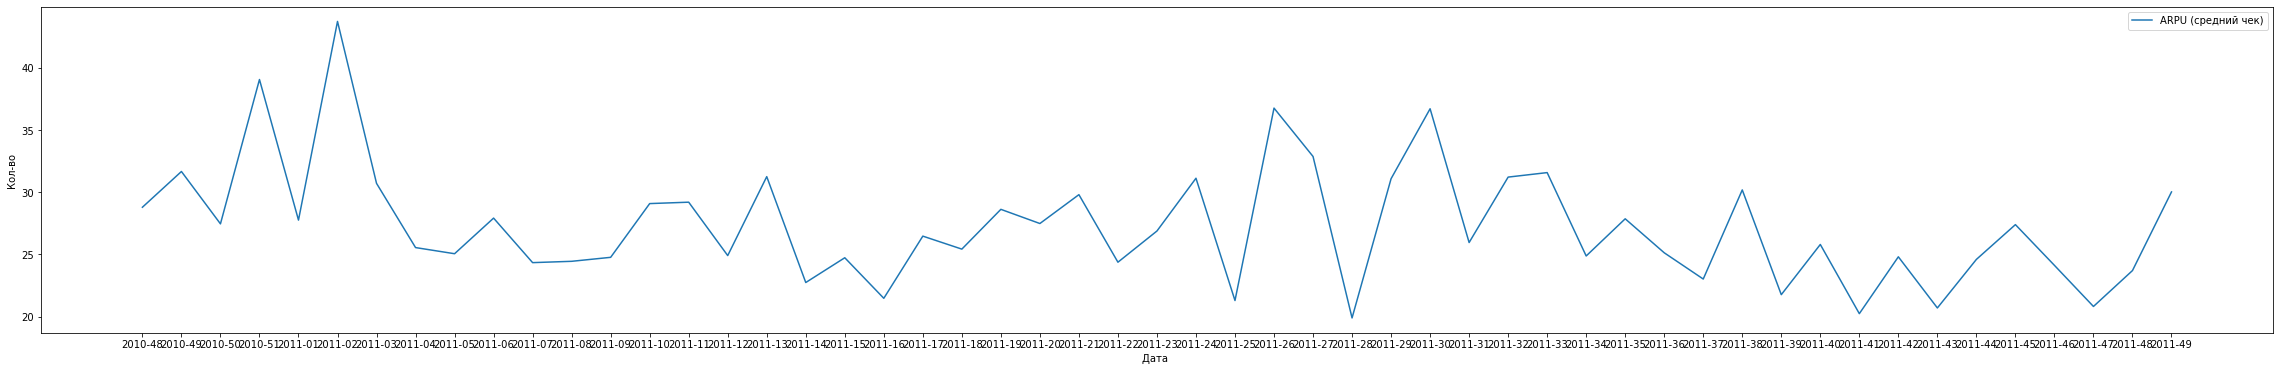

In [53]:
#Построим график с ARPU
sns.lineplot(data=df_ARPU_week,x='InvoiceDate_Year_week',y='ARPU_week',
             label="ARPU (средний чек)").set(xlabel='Дата ',ylabel='Кол-во')

In [54]:
# Сохраним df для построения дашборда
df.to_csv('Data Sample (AIC) для итоговой работы  - Online Retail-OUT.csv', sep='\t')

In [55]:
# Сохраним df_ARPU_week для построения дашборда
df_ARPU_week.to_csv('df_ARPU_week.csv', sep='\t')

### Выводы(продолжение):

ARPU(средний чек клиента) падает с начала 2011 года

### Общие выводы:
Из-за постоянного падения ARPU компании стоит поработать с меропоприятими, направленными на увеличение среднего чека-
запустить программы лояльности, сделать анализ причин падения ARPU(ассортимент, в рынке ли цены).

